# Diabetes Analysis

Dataset disponível no link: https://www.kaggle.com/mathchi/diabetes-data-set

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [117]:
base = pd.read_csv('https://raw.githubusercontent.com/RafaDias/diabetes-analysis/main/diabetes.csv')
base

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration

In [104]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [105]:
#identify nans
base.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [190]:
data_stats = base.describe()

data_stats.pop('Outcome')

# Transposed Matrix
data_stats = data_stats.transpose()

data_stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


<AxesSubplot:>

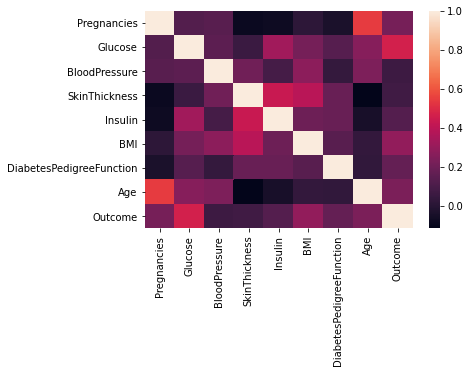

In [173]:
# Analysing correlation 

corr = base.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

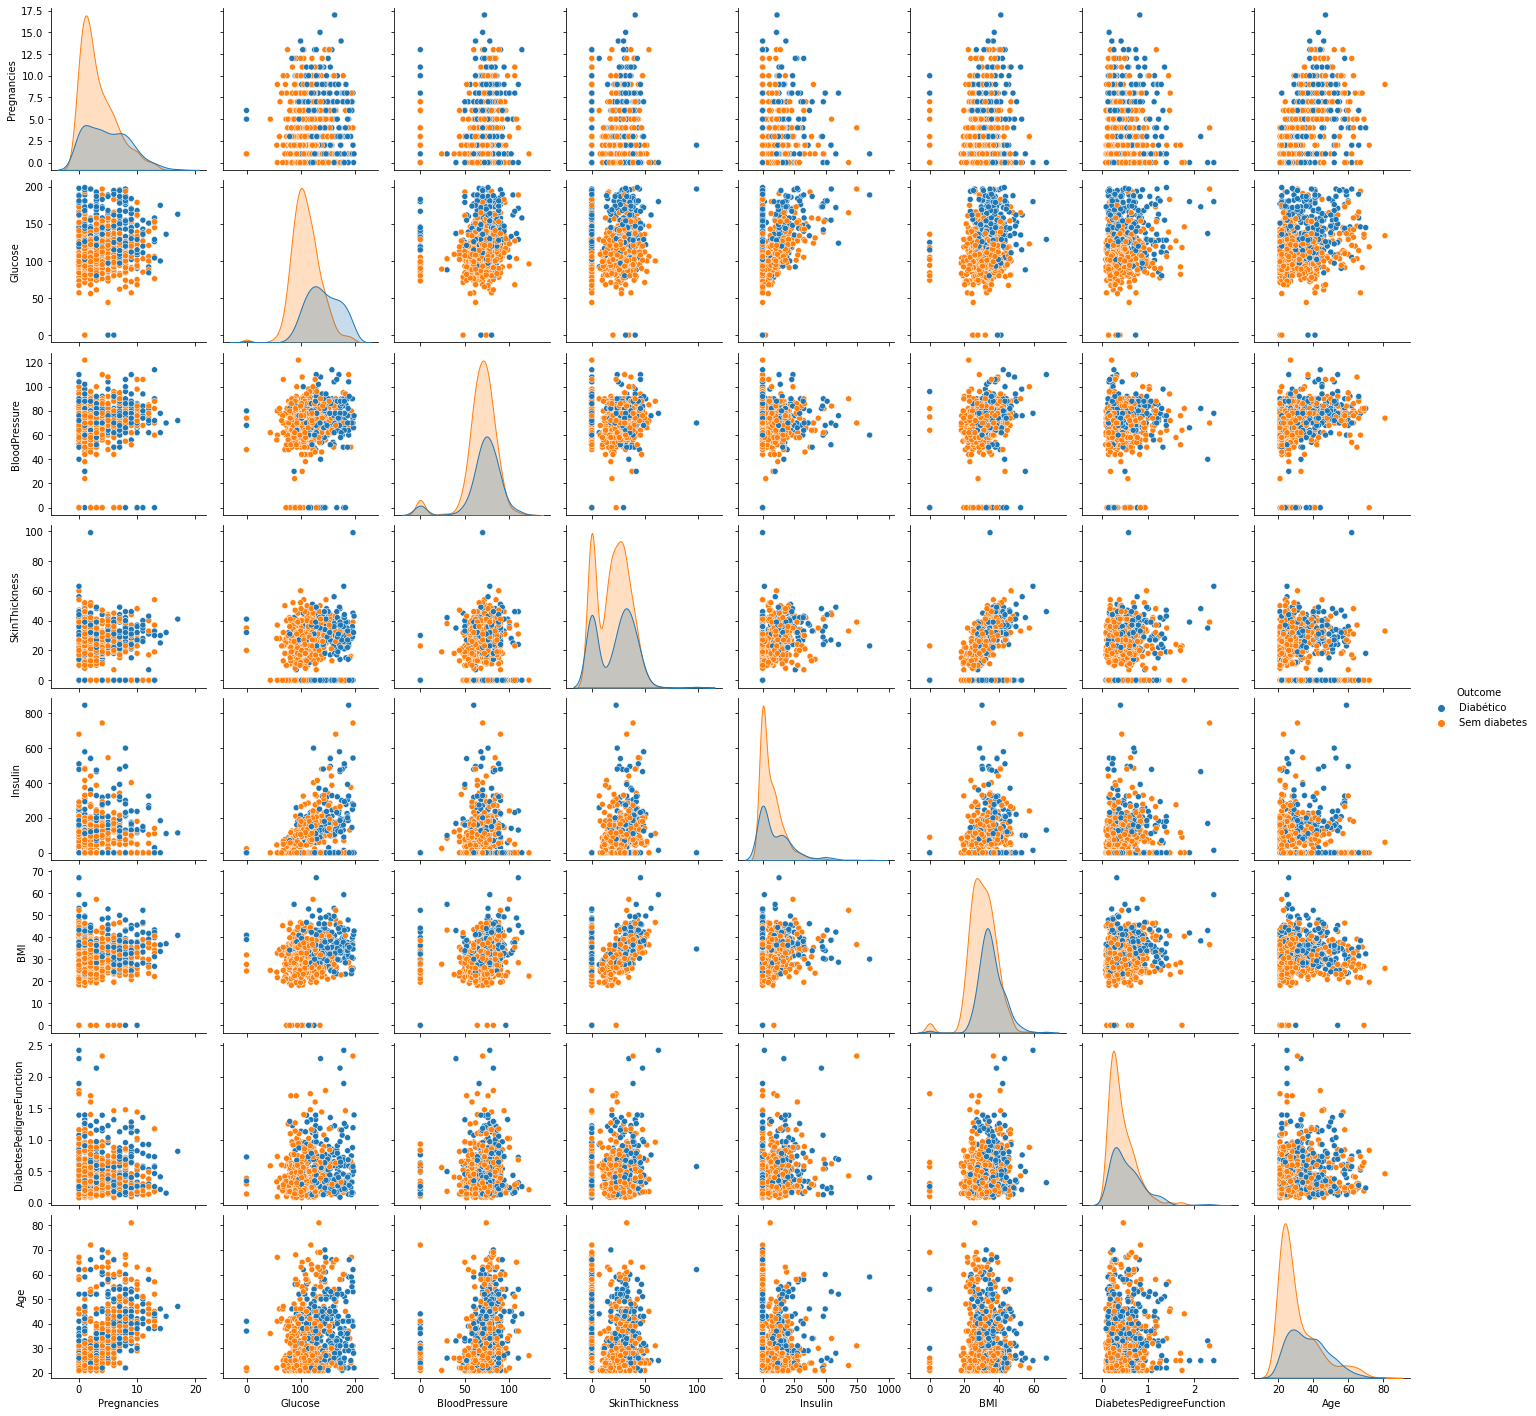

In [174]:
df = base.copy()
df['Outcome'] = np.where(df['Outcome'] == 1, "Diabético", "Sem diabetes")
sns.pairplot(df, hue='Outcome')

## Data Preparation

In [191]:
## Functions 

# Stardardization
def normStandard(x):
    return (x - data_stats['mean']) / data_stats['std']

# MinMax
def minMax(x):
    return (x - data_stats['min'])/(data_stats['max'] - data_stats['min'])

### Split the data into train and test

In [192]:
# 70% to train e 30% to test

train_dataset = base.sample(frac=0.7,random_state=0)
test_dataset = base.drop(train_dataset.index)

### Split features from labels with  feature scaling

In [193]:
train_labels = train_dataset.pop('Outcome')
test_labels = test_dataset.pop('Outcome')


In [194]:
test_labels

9      1
11     1
19     1
23     1
24     1
      ..
746    1
753    1
754    1
759    1
763    0
Name: Outcome, Length: 230, dtype: int64

### Feature Scaling the train data

In [195]:
# Standardization is the process of putting different variables on the same scale

normed_train_data = normStandard(train_dataset)
normed_test_data = normStandard(test_dataset)

## Applying KNN with Scikit-Learn

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [198]:
# Standardized data
#X_train = np.array(normed_train_data)
#X_test = np.array(normed_test_data)
#y_train = np.array(train_labels)
#y_test = np.array(test_labels)

In [199]:
# Without Standardization
#split the data into training and testing datasets
X = np.array(base.drop(['Outcome'], axis = 1))
y = np.array(base['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.3, 
                                                    random_state = 7)

Minimum error:- 0.22077922077922077 at K = 15


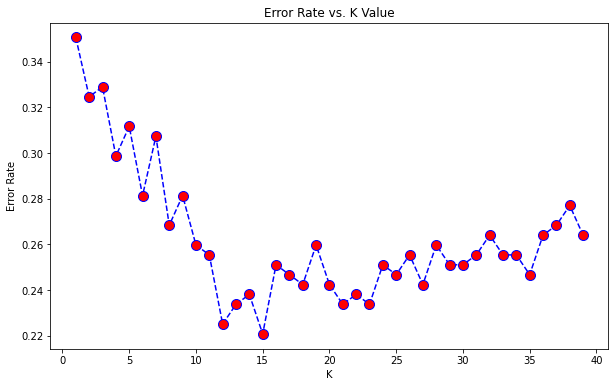

In [200]:
def get_best_k():
  error_rate = []
  for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

  plt.figure(figsize=(10,6))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
          marker='o',markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)

get_best_k()

In [201]:
#apply the knn method
Knn = KNeighborsClassifier(n_neighbors=15)

#train the data
Knn.fit(X_train,y_train)

#test the data
accuracy = Knn.score(X_test, y_test)
print('accuracy of the model is: ', accuracy)

accuracy of the model is:  0.7792207792207793


In [202]:
# Predict the labels of the test data: y_pred
y_pred = Knn.predict(X_test)

In [203]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[130  17]
 [ 34  50]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       147
           1       0.75      0.60      0.66        84

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

0.7792207792207793


## Applyng Logistic Regression with Keras 

In [204]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [205]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [206]:
def build_model():
    
    #Utilizando regularizadores

    reg = regularizers.L1L2(l1=0.00, l2=0.01)
    '''
    model = keras.Sequential([
        layers.Dense(1, activation='sigmoid', kernel_regularizer=reg, input_shape=[len(train_dataset.keys())])
    ])
    '''
    
    #Sem regularizadores
  
    model = keras.Sequential([
        layers.Dense(1, activation='sigmoid', input_shape=[len(train_dataset.keys())])
    ])
  
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [207]:
model = build_model()

In [208]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [209]:
# This callback will stop the training when there is no improvement in
# the validation accuracy for 10 consecutive epochs.

callback_EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

In [210]:
# Training 

EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, callbacks=[callback_EarlyStop])

Epoch 1/1000
17/17 [==============================] - 0s 823us/step - loss: 0.8100 - accuracy: 0.5149
Epoch 2/1000
17/17 [==============================] - 0s 903us/step - loss: 0.7970 - accuracy: 0.5242
Epoch 3/1000
17/17 [==============================] - 0s 916us/step - loss: 0.7864 - accuracy: 0.5372
Epoch 4/1000
17/17 [==============================] - 0s 967us/step - loss: 0.7762 - accuracy: 0.5483
Epoch 5/1000
17/17 [==============================] - 0s 784us/step - loss: 0.7662 - accuracy: 0.5558
Epoch 6/1000
17/17 [==============================] - 0s 1ms/step - loss: 0.7569 - accuracy: 0.5706
Epoch 7/1000
17/17 [==============================] - 0s 899us/step - loss: 0.7479 - accuracy: 0.5781
Epoch 8/1000
17/17 [==============================] - 0s 956us/step - loss: 0.7392 - accuracy: 0.5855
Epoch 9/1000
17/17 [==============================] - 0s 935us/step - loss: 0.7305 - accuracy: 0.5948
Epoch 10/1000
17/17 [==============================] - 0s 932us/step - loss: 0.7224 

In [211]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
128,0.462005,0.789963,128
129,0.461867,0.788104,129
130,0.461645,0.789963,130
131,0.461472,0.789963,131
132,0.461284,0.791822,132


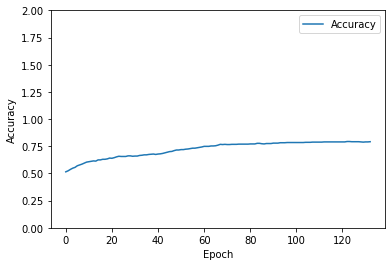

In [212]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Accuracy')
    plt.ylim([0,2])
    plt.legend()


plot_history(history)

In [213]:
# Test data
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Accuracy: {:5.2f} Quality".format(accuracy))

8/8 - 0s - loss: 0.5139 - accuracy: 0.7435
Testing set Accuracy:  0.74 Quality


## Neural network with pytorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

ModuleNotFoundError: No module named 'torch'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RafaDias/diabetes-analysis/main/diabetes.csv')
X = df.drop('Outcome',axis=1).values #independent features
y = df['Outcome'].values # dependent features

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

NameError: name 'pd' is not defined

In [ ]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [4]:
### instantiate
torch.manual_seed(20)
model = ANN_Model()

### Backword propagation - loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

NameError: name 'torch' is not defined

In [ ]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Build and plot confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

NameError: name 'y_test' is not defined

### get accuracy

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score